In [52]:
library(vegan)
library(tidyverse)
library(PCAtools)
library(recluster)
library(corrplot)
library(RcmdrMisc)
library(ggord)

In [41]:
load("../computer_lab/AB332_lab_I.RData")

In [42]:
# Calculate dissimilarity matrix for different distance metrics
otu.tab.trans.ss.nozero.bray <- vegdist(otu.tab.trans.ss.nozero, method = "bray")

otu.tab.trans.ss.nozero.pa <- decostand(otu.tab.trans.ss.nozero, method = "pa")
otu.tab.trans.ss.nozero.pa.jaccard <- vegdist(otu.tab.trans.ss.nozero.pa, method = "jaccard")
otu.tab.trans.ss.nozero.pa.sorensen <- vegdist(otu.tab.trans.ss.nozero.pa, method = "bray", binary = TRUE)

# BEGIN: Mantel test of the 3 dissimilarity matrices
mantel(otu.tab.trans.ss.nozero.bray, otu.tab.trans.ss.nozero.pa.jaccard)
mantel(otu.tab.trans.ss.nozero.bray, otu.tab.trans.ss.nozero.pa.sorensen)
mantel(otu.tab.trans.ss.nozero.pa.jaccard, otu.tab.trans.ss.nozero.pa.sorensen)
# END: Mantel test of the 3 dissimilarity matrices


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = otu.tab.trans.ss.nozero.bray, ydis = otu.tab.trans.ss.nozero.pa.jaccard) 

Mantel statistic r: 0.9097 
      Significance: 0.001 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0349 0.0534 0.0662 0.0844 
Permutation: free
Number of permutations: 999



Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = otu.tab.trans.ss.nozero.bray, ydis = otu.tab.trans.ss.nozero.pa.sorensen) 

Mantel statistic r: 0.901 
      Significance: 0.001 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0378 0.0503 0.0654 0.0757 
Permutation: free
Number of permutations: 999



Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = otu.tab.trans.ss.nozero.pa.jaccard, ydis = otu.tab.trans.ss.nozero.pa.sorensen) 

Mantel statistic r: 0.9966 
      Significance: 0.001 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0337 0.0463 0.0571 0.0831 
Permutation: free
Number of permutations: 999


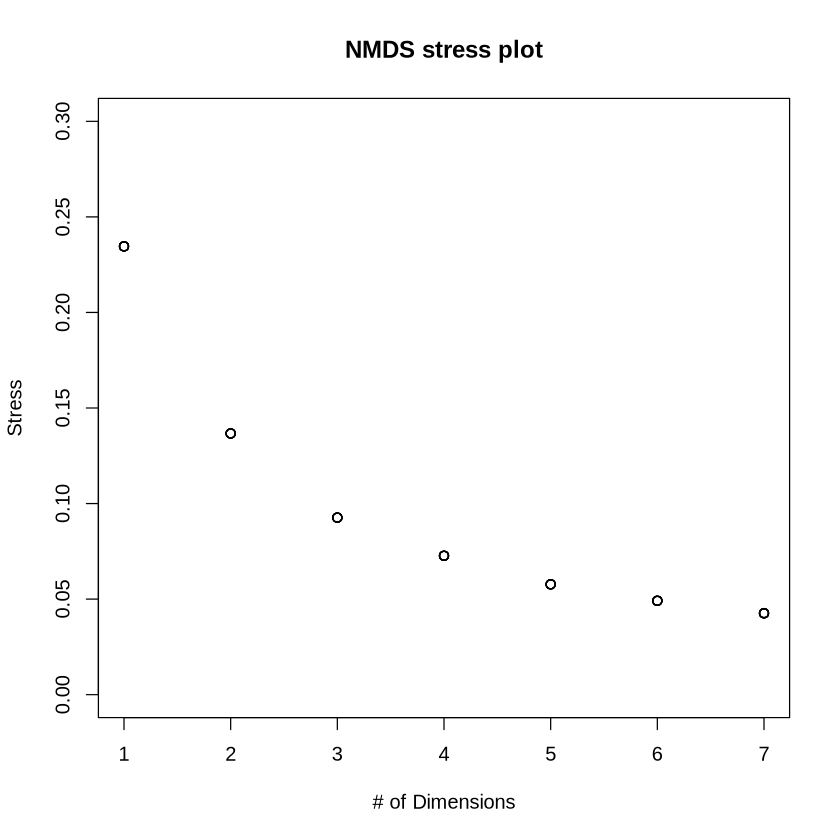

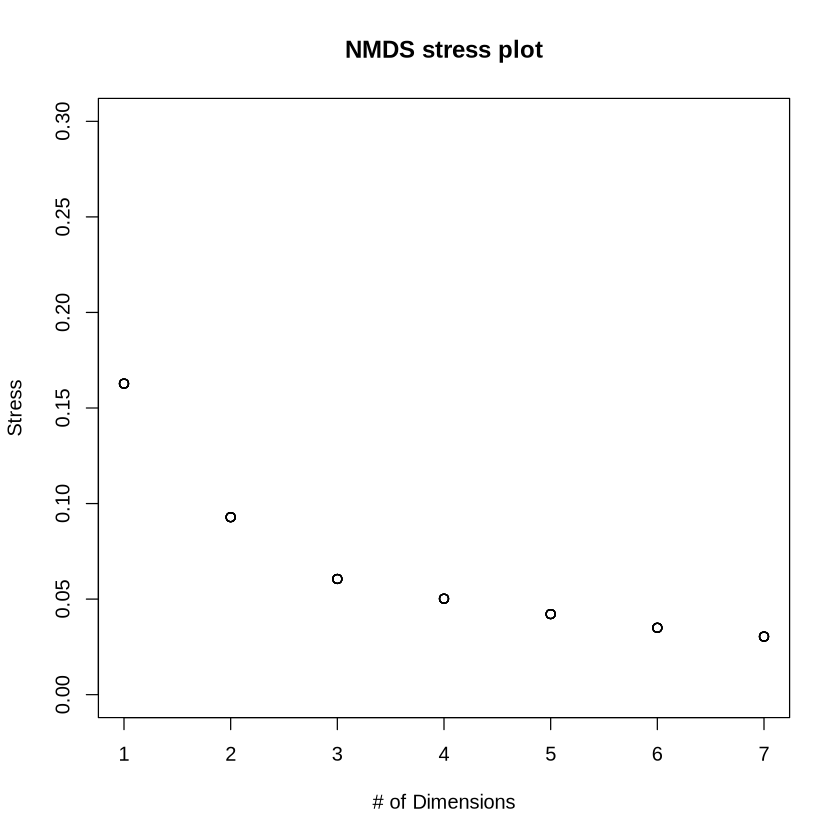

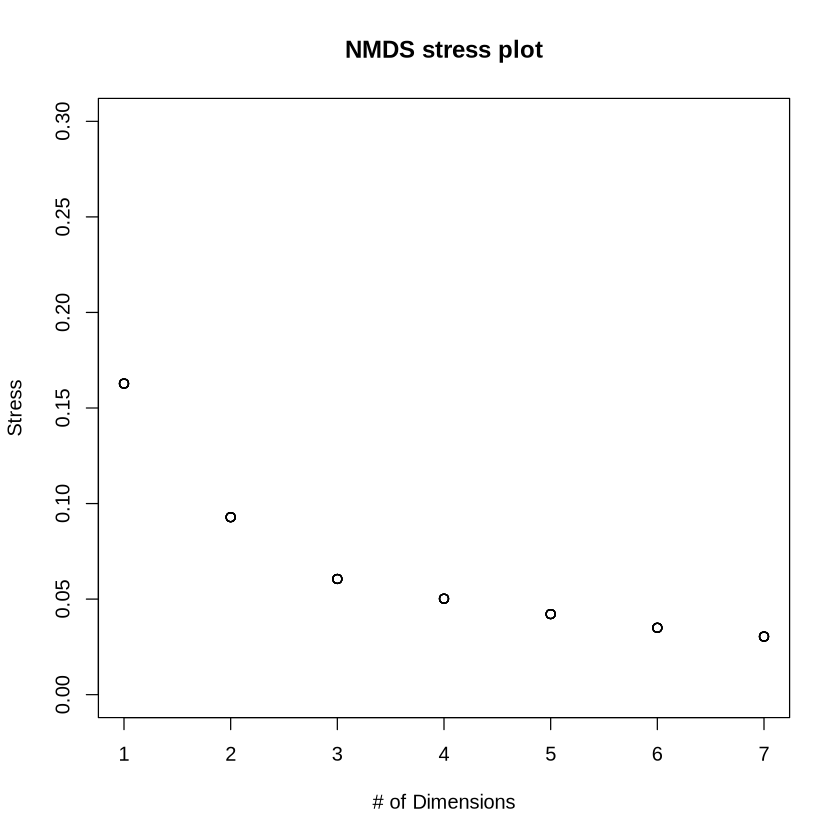

In [43]:

# Graph the stress values for different NMDS plots 
set.seed(666) # Set a seed to make results reproducible
NMDS.scree <- function(x) { # x is the name of the distance matrix
    plot(rep(1, 7), replicate(7, metaMDS(x, autotransform = FALSE, k = 1)$stress), xlim = c(1, 7), ylim = c(0, 0.30), xlab = "# of Dimensions", ylab = "Stress", main = "NMDS stress plot")
    for (i in 1:7) {
        points(rep(i + 1, 7), replicate(7, metaMDS(x, autotransform = FALSE, k = i + 1)$stress))
    }
}

par(bg = "white")
invisible(capture.output(NMDS.scree(otu.tab.trans.ss.nozero.bray)))
invisible(capture.output(NMDS.scree(otu.tab.trans.ss.nozero.pa.jaccard)))
invisible(capture.output(NMDS.scree(otu.tab.trans.ss.nozero.pa.sorensen)))


Call:
metaMDS(comm = otu.tab.trans.ss.nozero, distance = "bray", k = 2,      trymax = 100, autotransform = FALSE, trace = FALSE) 

global Multidimensional Scaling using monoMDS

Data:     otu.tab.trans.ss.nozero 
Distance: bray 

Dimensions: 2 
Stress:     0.1366727 
Stress type 1, weak ties
Best solution was not repeated after 100 tries
The best solution was from try 0 (metric scaling or null solution)
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘otu.tab.trans.ss.nozero’ 


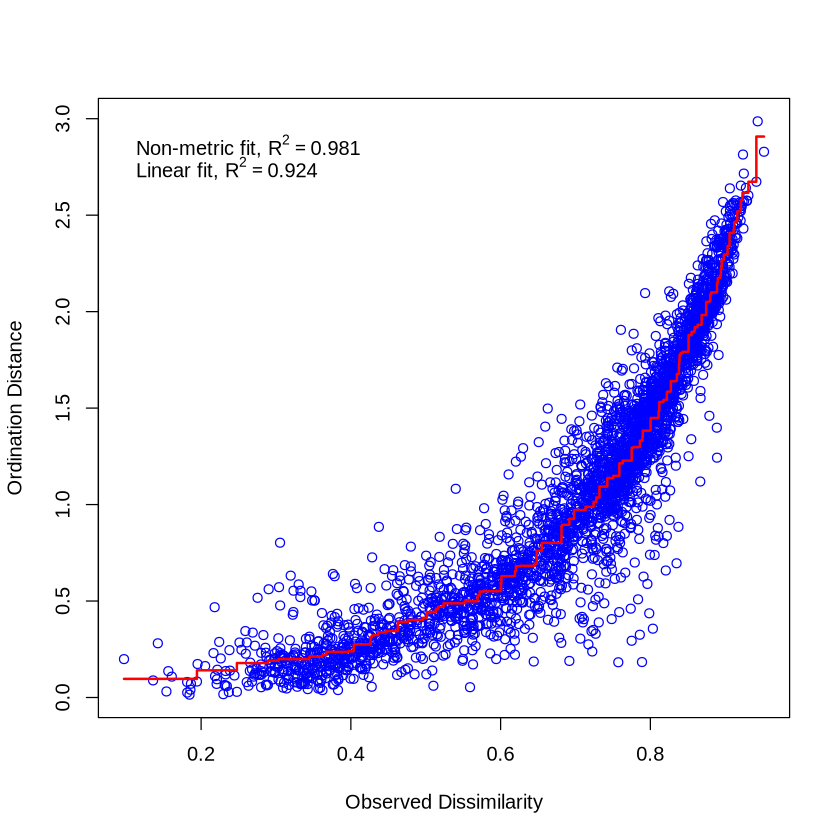

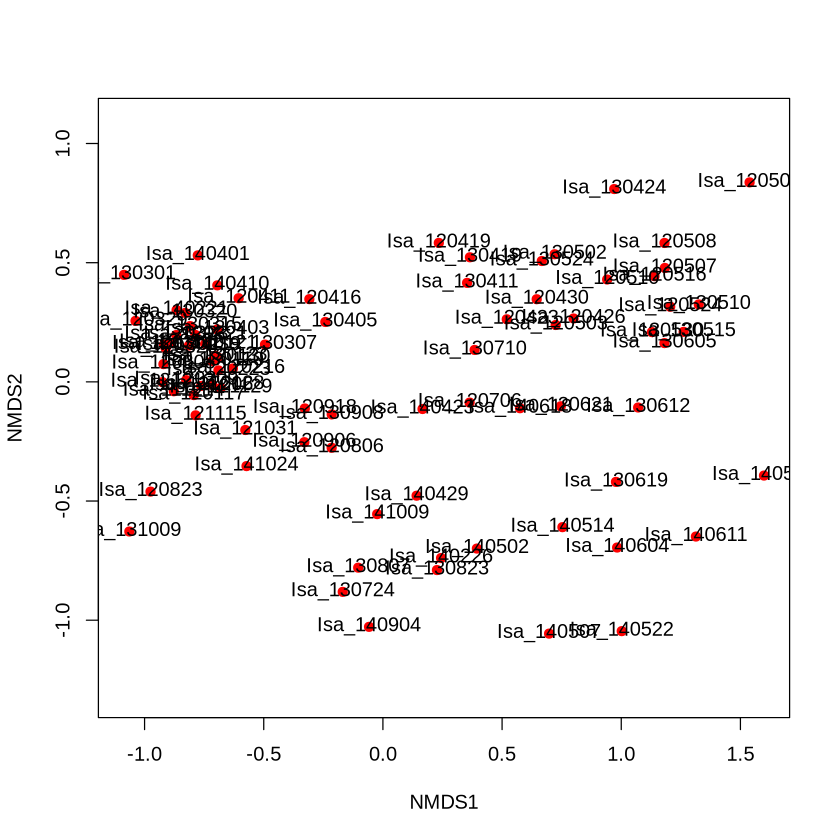

In [44]:

otu.tab.trans.ss.nozero.bray.nmds <- metaMDS(otu.tab.trans.ss.nozero, k = 2, trymax = 100, trace = FALSE, autotransform = FALSE, distance = "bray")
otu.tab.trans.ss.nozero.bray.nmds

par(bg = "white")
stressplot(otu.tab.trans.ss.nozero.bray.nmds) 
plot(otu.tab.trans.ss.nozero.bray.nmds, display = "sites", type = "n")
points(otu.tab.trans.ss.nozero.bray.nmds, display = "sites", col = "red", pch = 19)
text(otu.tab.trans.ss.nozero.bray.nmds, display = "sites")


Call:
metaMDS(comm = otu.tab.trans.ss.nozero.pa, distance = "jaccard",      k = 2, trymax = 100, autotransform = FALSE, trace = FALSE,      binary = TRUE) 

global Multidimensional Scaling using monoMDS

Data:     otu.tab.trans.ss.nozero.pa 
Distance: binary jaccard 

Dimensions: 2 
Stress:     0.09283106 
Stress type 1, weak ties
Best solution was repeated 1 time in 24 tries
The best solution was from try 15 (random start)
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘otu.tab.trans.ss.nozero.pa’ 


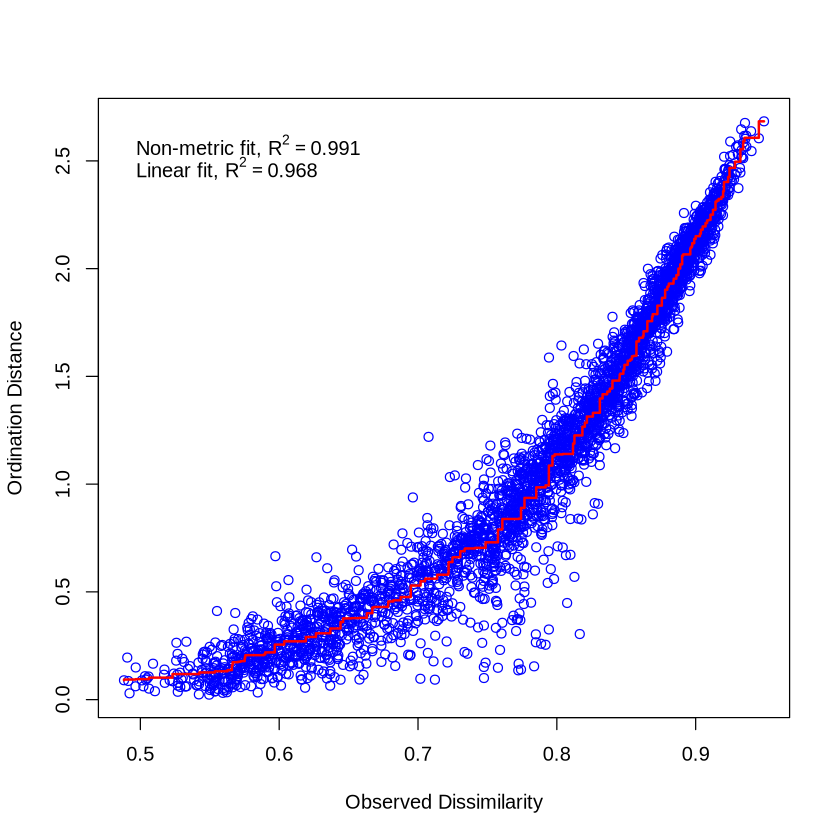

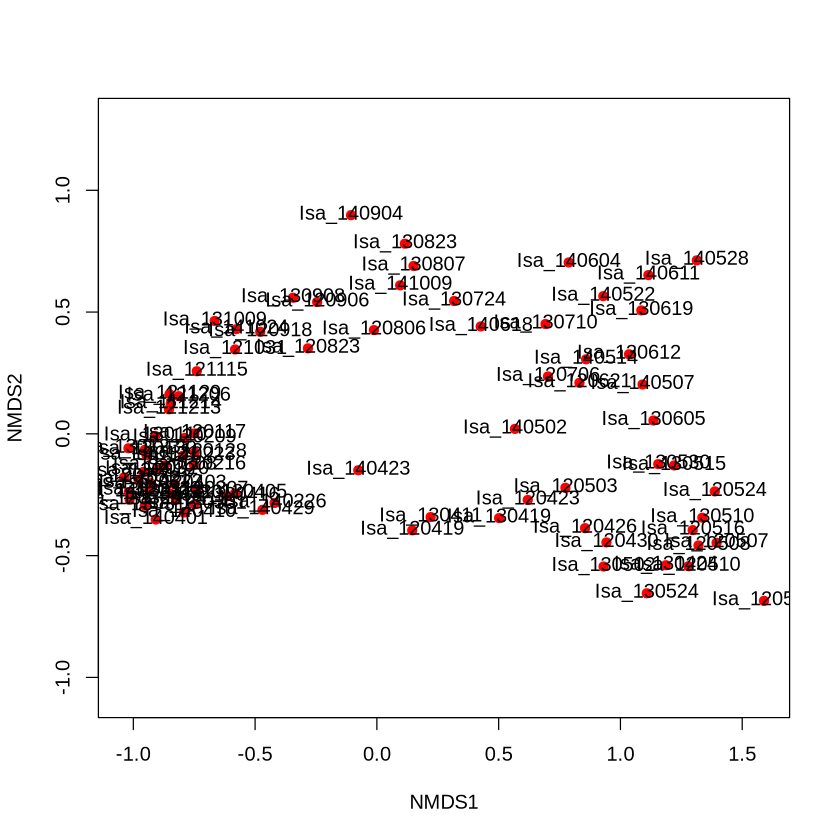

In [45]:

otu.tab.trans.ss.nozero.pa.jaccard.nmds <- metaMDS(otu.tab.trans.ss.nozero.pa, k = 2, trymax = 100, trace = FALSE, autotransform = FALSE, distance = "jaccard", binary = TRUE)
otu.tab.trans.ss.nozero.pa.jaccard.nmds

par(bg = "white")
stressplot(otu.tab.trans.ss.nozero.pa.jaccard.nmds) 
plot(otu.tab.trans.ss.nozero.pa.jaccard.nmds, display = "sites", type = "n")
points(otu.tab.trans.ss.nozero.pa.jaccard.nmds, display = "sites", col = "red", pch = 19)
text(otu.tab.trans.ss.nozero.pa.jaccard.nmds, display = "sites")


Call:
metaMDS(comm = otu.tab.trans.ss.nozero.pa, distance = "bray",      k = 2, trymax = 100, autotransform = FALSE, trace = FALSE,      binary = TRUE) 

global Multidimensional Scaling using monoMDS

Data:     otu.tab.trans.ss.nozero.pa 
Distance: binary bray 

Dimensions: 2 
Stress:     0.09287248 
Stress type 1, weak ties
Best solution was repeated 6 times in 20 tries
The best solution was from try 4 (random start)
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘otu.tab.trans.ss.nozero.pa’ 


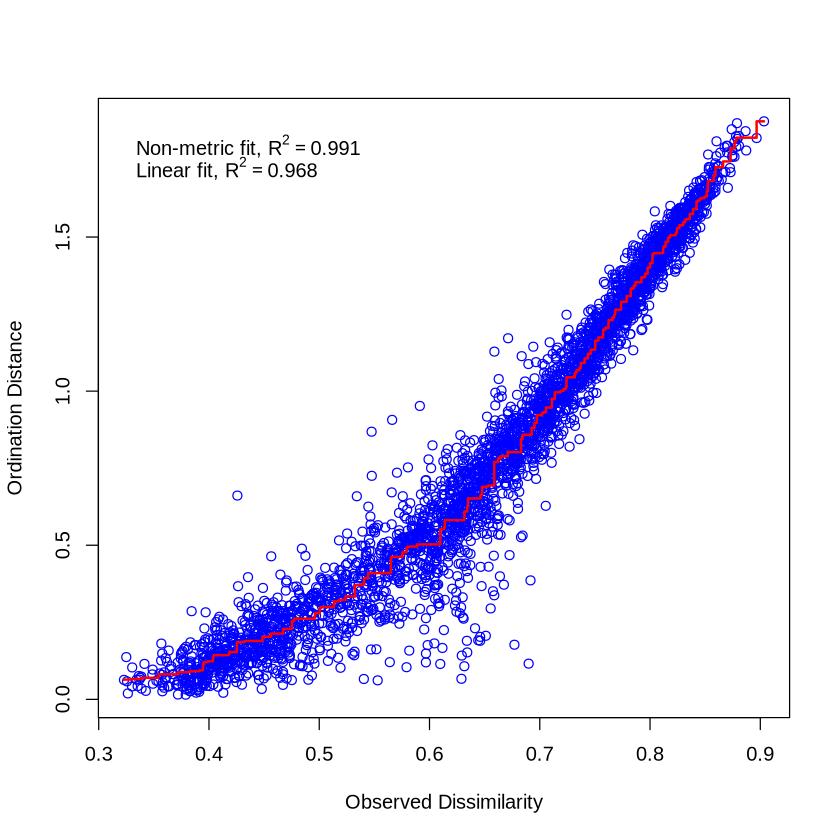

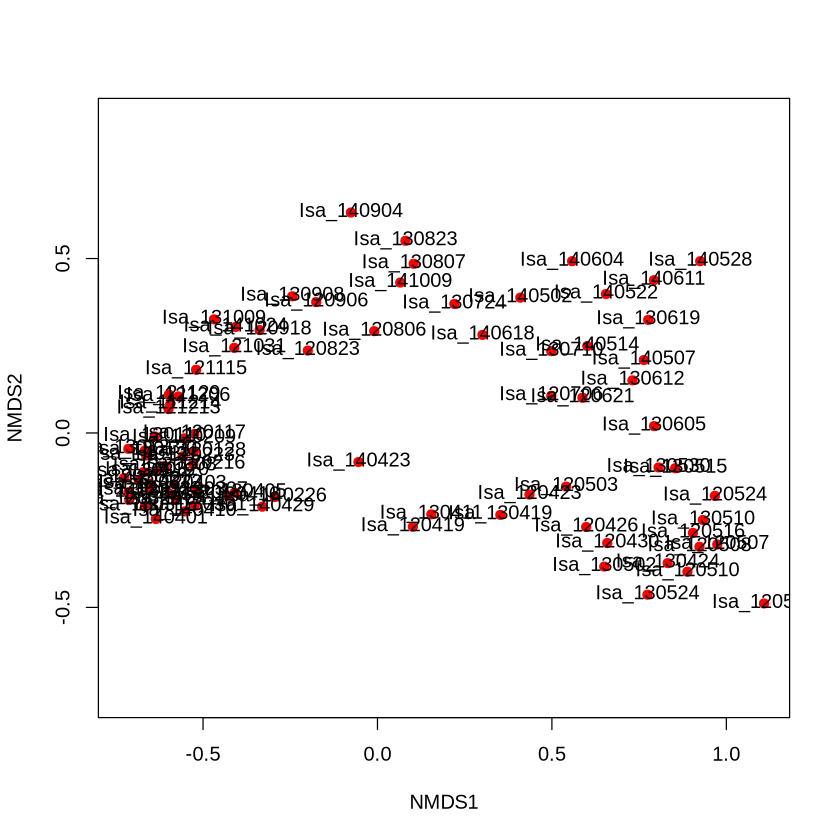

In [46]:
otu.tab.trans.ss.nozero.pa.sorensen.nmds <- metaMDS(otu.tab.trans.ss.nozero.pa, k = 2, trymax = 100, trace = FALSE, autotransform = FALSE, distance = "bray", binary = TRUE)
otu.tab.trans.ss.nozero.pa.sorensen.nmds

par(bg = "white")
stressplot(otu.tab.trans.ss.nozero.pa.sorensen.nmds) 
plot(otu.tab.trans.ss.nozero.pa.sorensen.nmds, display = "sites", type = "n")
points(otu.tab.trans.ss.nozero.pa.sorensen.nmds, display = "sites", col = "red", pch = 19)
text(otu.tab.trans.ss.nozero.pa.sorensen.nmds, display = "sites")

In [47]:
par(bg = "white")
# Set up the plotting area to have 3 plots in a row
par(mfrow = c(1, 3), mar = c(4, 4, 2, 1), oma = c(0, 0, 2, 0))  # Adjust margins

# Plot for Bray-Curtis distance
plot(otu.tab.trans.ss.nozero.bray.nmds, display = "sites", type = "n", main = "Bray-Curtis", xlim = c(-1, 1), ylim = c(-1, 1))
points(otu.tab.trans.ss.nozero.bray.nmds, display = "sites", col = "red", pch = 19)
text(otu.tab.trans.ss.nozero.bray.nmds, display = "sites")

# Plot for Jaccard distance
plot(otu.tab.trans.ss.nozero.pa.jaccard.nmds, display = "sites", type = "n", main = "Jaccard", xlim = c(-1, 1), ylim = c(-1, 1))
points(otu.tab.trans.ss.nozero.pa.jaccard.nmds, display = "sites", col = "blue", pch = 19)
text(otu.tab.trans.ss.nozero.pa.jaccard.nmds, display = "sites")

# Plot for Sorensen distance
plot(otu.tab.trans.ss.nozero.pa.sorensen.nmds, display = "sites", type = "n", main = "Sorensen", xlim = c(-1, 1), ylim = c(-1, 1))
points(otu.tab.trans.ss.nozero.pa.sorensen.nmds, display = "sites", col = "green", pch = 19)
text(otu.tab.trans.ss.nozero.pa.sorensen.nmds, display = "sites")

# Reset plotting area
par(mfrow = c(1, 1))

print("Procrustes analysis is a statistical method used to compare the shapes of two or more datasets by minimizing the sum of squared differences between corresponding points. In the provided code, the protest function is used to perform Procrustes analysis between different NMDS (Non-metric Multidimensional Scaling) ordinations based on Bray-Curtis, Jaccard, and Sorensen distances. The output of protest typically includes a Procrustes statistic (often called the "Procrustes sum of squares"), a significance test (p-value), and a correlation-like measure (Procrustes correlation). To analyze the output, you should look at the Procrustes statistic to understand the degree of similarity between the datasets, the p-value to determine if the observed similarity is statistically significant, and the Procrustes correlation to gauge the strength of the relationship between the ordinations. A low Procrustes statistic, a high Procrustes correlation, and a significant p-value indicate a strong similarity between the datasets.")

# BEGIN: Procrustes analysis
protest(otu.tab.trans.ss.nozero.bray.nmds, otu.tab.trans.ss.nozero.pa.jaccard.nmds)
protest(otu.tab.trans.ss.nozero.bray.nmds, otu.tab.trans.ss.nozero.pa.sorensen.nmds)
protest(otu.tab.trans.ss.nozero.pa.jaccard.nmds, otu.tab.trans.ss.nozero.pa.sorensen.nmds)
# END: Procrustes analysis

ERROR: Error in parse(text = input): <text>:23:471: unexpected symbol
23: ed to perform Procrustes analysis between different NMDS (Non-metric Multidimensional Scaling) ordinations based on Bray-Curtis, Jaccard, and Sorensen distances. The output of protest typicall
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           ^


In [53]:
# Now load in metadata for plotting and other features
isa.metadata <- read_tsv("../computer_lab/data/AB332metadata_v3.txt")
isa.metadata <- column_to_rownames(isa.metadata, var = "Sample_Name")

# Show available metadata
colnames(isa.metadata)

Rows: 82 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Sample_Name, date, seasons
dbl (23): year, season_nr, month, day, DOY, running_day, template, depth, de...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "date"        "year"        "season_nr"   "seasons"     "month"      
 [6] "day"         "DOY"         "running_day" "template"    "depth"      
[11] "declination" "daylength"   "nitrate"     "phosphate"   "silicate"   
[16] "N_P"         "watermass"   "temp_25"     "sal_25"      "F_25"       
[21] "chla_GFF"    "chla_10"     "chl_small"   "bacteria"    "virus"

Warning message:
“ggrepel: 33 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


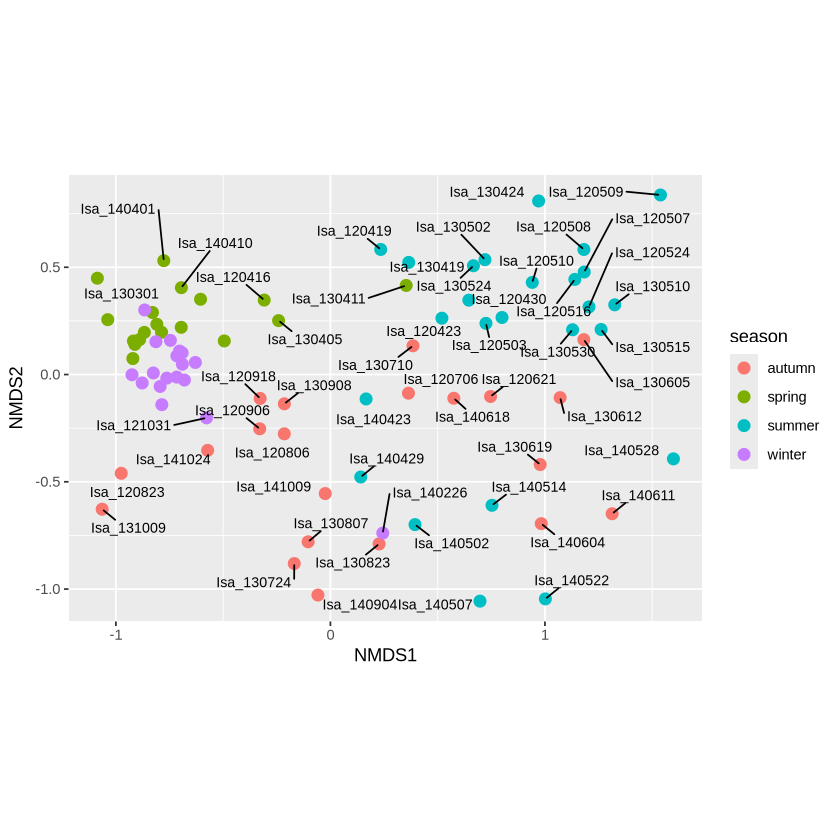

In [50]:
# Now continue with just the bray-curtis analysis. Plotting the NMDS scores with season as the color
otu.tab.trans.ss.nozero.bray.nmds.scores <- as.data.frame(scores(otu.tab.trans.ss.nozero.bray.nmds)$sites)
otu.tab.trans.ss.nozero.bray.nmds.scores$season <- isa.metadata$seasons
otu.tab.trans.ss.nozero.bray.nmds.scores$month <- as.factor(isa.metadata$month)
otu.tab.trans.ss.nozero.bray.nmds.scores$samples <- rownames(otu.tab.trans.ss.nozero.bray.nmds.scores)

ggplot(otu.tab.trans.ss.nozero.bray.nmds.scores) +
  geom_point(mapping = aes(x = NMDS1, y = NMDS2, colour = season), size = 3) +
  coord_fixed() + ## need aspect ratio of 1!
  geom_text_repel(
    box.padding = 0.5, aes(x = NMDS1, y = NMDS2, label = samples),
    size = 3
  )

Warning message:
“ggrepel: 38 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


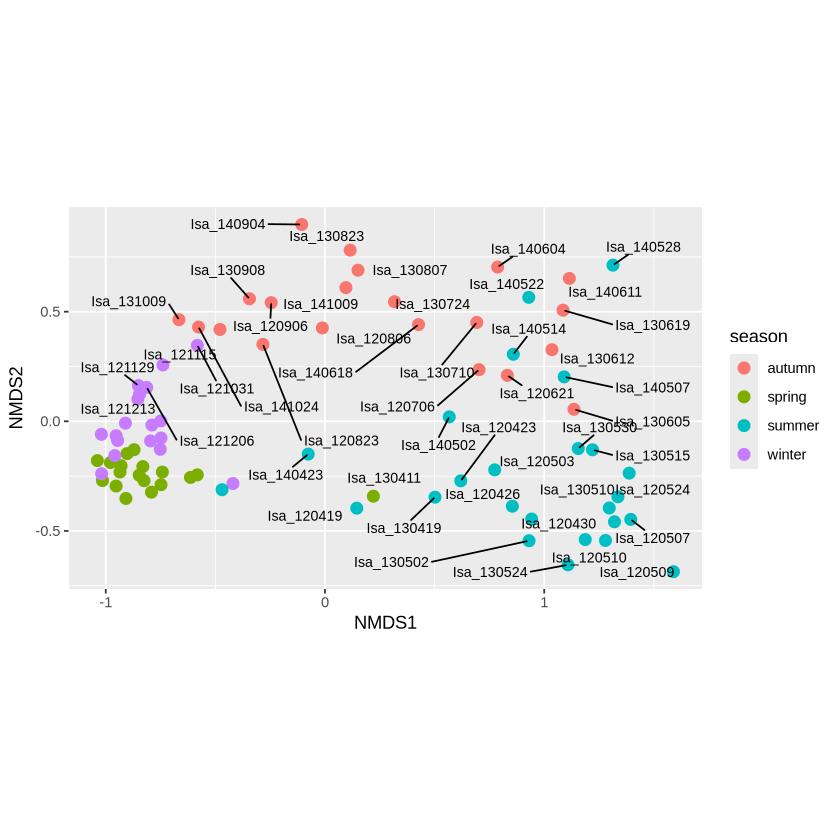

In [65]:
# Plotting the NMDS scores with season as the color for Jaccard distance
otu.tab.trans.ss.nozero.pa.jaccard.nmds.scores <- as.data.frame(scores(otu.tab.trans.ss.nozero.pa.jaccard.nmds)$sites)
otu.tab.trans.ss.nozero.pa.jaccard.nmds.scores$season <- isa.metadata$seasons
otu.tab.trans.ss.nozero.pa.jaccard.nmds.scores$month <- as.factor(isa.metadata$month)
otu.tab.trans.ss.nozero.pa.jaccard.nmds.scores$samples <- rownames(otu.tab.trans.ss.nozero.pa.jaccard.nmds.scores)

ggplot(otu.tab.trans.ss.nozero.pa.jaccard.nmds.scores) +
    geom_point(mapping = aes(x = NMDS1, y = NMDS2, colour = season), size = 3) +
    coord_fixed() + ## need aspect ratio of 1!
    geom_text_repel(
        box.padding = 0.5, aes(x = NMDS1, y = NMDS2, label = samples),
        size = 3
    )

In [54]:
# Check that samples in th eOTU table and metadata are the same:
identical(colnames(otu.tab),rownames(isa.metadata))

[1] TRUE

In [56]:
# Select continuous variables 
# Here we extract 8 based on column names
isa.metadata.cont <- isa.metadata %>% dplyr::select("nitrate","phosphate","silicate","N_P","temp_25","sal_25","F_25","chla_GFF")

# We then scale using z-scores
isa.metadata.cont.zscores <- scale(isa.metadata.cont, center = T, scale = T)
isa.metadata.cont.zscores[1:5,]

,nitrate,phosphate,silicate,N_P,temp_25,sal_25,F_25,chla_GFF
Isa_111214,-0.4175780,-0.98798179,-0.3889647,1.723760,-0.3551843,-0.5973781,-0.5582822,-0.4767619
Isa_120117,NA,NA,NA,NA,-1.6008089,-0.9389450,-0.4929431,-0.4693643
Isa_120128,1.0688412,-0.26147834,1.8527212,2.714279,-1.3286509,-0.7958146,-0.5582822,-0.4710249
Isa_120209,1.1025469,0.02912304,1.9281988,2.053933,-1.2989999,-0.9686465,-0.5582822,-0.4739069
Isa_120216,0.4958452,-0.50364616,0.4714804,2.384106,-1.2005933,-0.6255433,-0.5582822,-0.4739069


In [58]:
# Looking at the environmental variables and if they correlate with each other:
(env.corr.signif.adjust <- rcorr.adjust(as.matrix(isa.metadata.cont.zscores)))  


 Pearson correlations:
          nitrate phosphate silicate     N_P temp_25  sal_25    F_25 chla_GFF
nitrate    1.0000    0.8979   0.8861  0.7770 -0.2057  0.6572 -0.2854  -0.2808
phosphate  0.8979    1.0000   0.7939  0.5109 -0.1892  0.7293 -0.2083  -0.2009
silicate   0.8861    0.7939   1.0000  0.6778 -0.3176  0.4632 -0.3413  -0.2841
N_P        0.7770    0.5109   0.6778  1.0000 -0.2754  0.3676 -0.2605  -0.2674
temp_25   -0.2057   -0.1892  -0.3176 -0.2754  1.0000 -0.2712  0.0441  -0.1186
sal_25     0.6572    0.7293   0.4632  0.3676 -0.2712  1.0000  0.1186   0.0703
F_25      -0.2854   -0.2083  -0.3413 -0.2605  0.0441  0.1186  1.0000   0.8331
chla_GFF  -0.2808   -0.2009  -0.2841 -0.2674 -0.1186  0.0703  0.8331   1.0000

 Number of observations: 74 

 Pairwise two-sided p-values:
          nitrate phosphate silicate N_P    temp_25 sal_25 F_25   chla_GFF
nitrate           <.0001    <.0001   <.0001 0.0787  <.0001 0.0137 0.0154  
phosphate <.0001            <.0001   <.0001 0.1065  <.0001 0.07

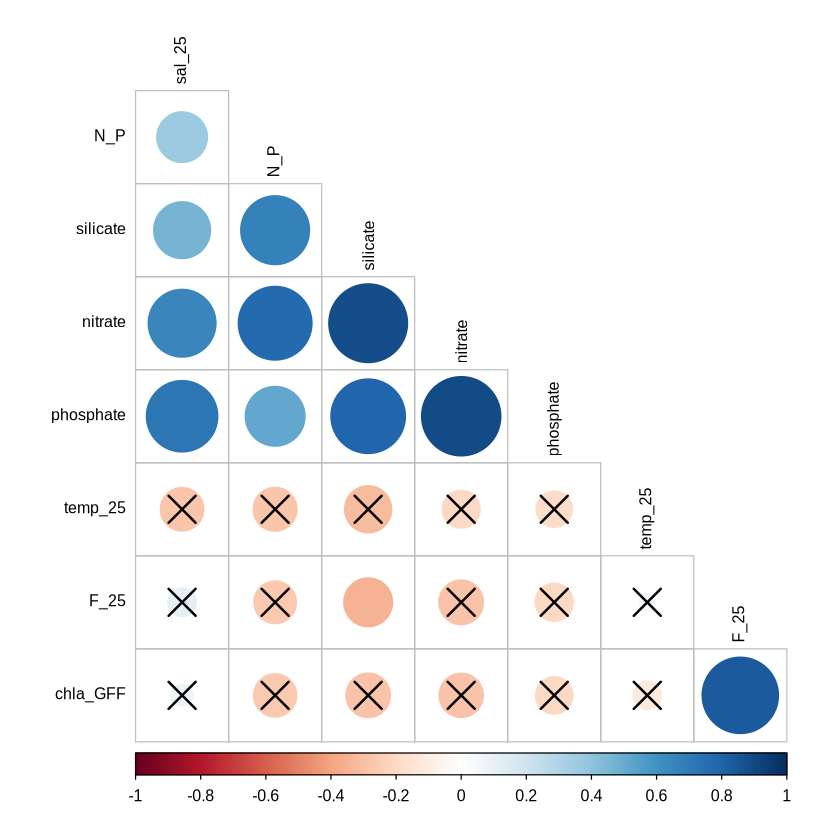

In [62]:
env.corr.signif.r <- env.corr.signif.adjust$R$r
env.corr.signif.p <- env.corr.signif.adjust$P
# Edit the object to replace any "<" by "0" using the function "gsub"
env.corr.signif.p <- gsub("<","0", env.corr.signif.p)
# Modify the object to be numeric datatype.
# NB: the transformation is done so the matrix of p values can be read as numeric!
env.corr.signif.p <- apply(env.corr.signif.p, 2 ,as.numeric)
rownames(env.corr.signif.p) <- colnames(env.corr.signif.p)
par(bg = "white")
corrplot(env.corr.signif.r , type="lower", order="hclust", p.mat = env.corr.signif.p, sig.level = 0.05,insig = "pch",hclust.method = c("average"), tl.cex= 0.8, tl.col="black", diag=F)

# TODO:

- What do these correlations mean for the modelling? What can we say about them... 
- What other environmentla variables to look at... bacteria, virus other Chl A
- How do we deal with NA values in our dataset? Particularly at:
    - 


***VECTORS

             NMDS1    NMDS2     r2 Pr(>r)    
nitrate   -0.93036  0.36665 0.1875  0.001 ***
phosphate -0.68374  0.72973 0.2187  0.001 ***
silicate  -0.75914  0.65093 0.2527  0.001 ***
N_P       -0.96539  0.26081 0.1916  0.001 ***
temp_25    0.01668 -0.99986 0.4919  0.001 ***
sal_25    -0.02388  0.99971 0.0391  0.241    
F_25       0.97074  0.24011 0.4019  0.001 ***
chla_GFF   0.76026  0.64962 0.3736  0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 999

8 observations deleted due to missingness

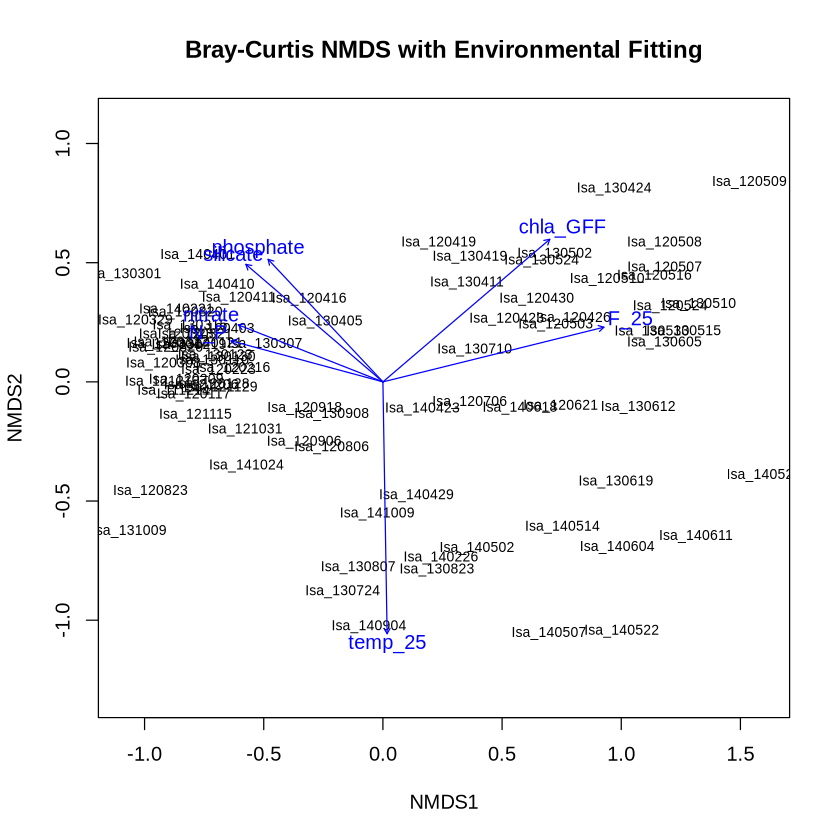

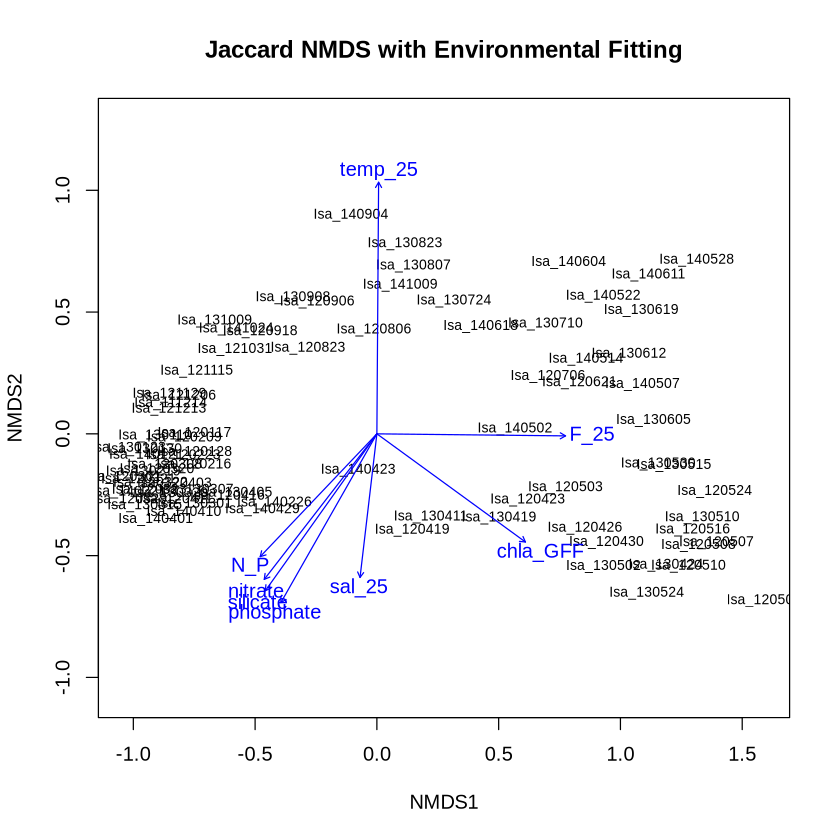

In [79]:
# Now let's fit environmental variables to the ordinations (i.e. NMDS?)

otu.tab.trans.ss.nozero.bray.nmds.envfit <- envfit(otu.tab.trans.ss.nozero.bray.nmds, 
                                            as.data.frame(isa.metadata.cont.zscores),  permu=999, na.rm=T, display ="sites")
otu.tab.trans.ss.nozero.bray.nmds.envfit

par(bg = "white")
plot(otu.tab.trans.ss.nozero.bray.nmds, type="t", display="sites", main = "Bray-Curtis NMDS with Environmental Fitting") # plot the samples

# Only plotting those variables that are significant
plot(otu.tab.trans.ss.nozero.bray.nmds.envfit, p.max=0.01)

otu.tab.trans.ss.nozero.pa.jaccard.nmds.envfit <- envfit(otu.tab.trans.ss.nozero.pa.jaccard.nmds, 
                                            as.data.frame(isa.metadata.cont.zscores),  permu=999, na.rm=T, display ="sites")

plot(otu.tab.trans.ss.nozero.pa.jaccard.nmds, type="t", display="sites", main = "Jaccard NMDS with Environmental Fitting") # plot the samples

# Only plotting those variables that are significant
plot(otu.tab.trans.ss.nozero.pa.jaccard.nmds.envfit, p.max=0.01)                                

In [81]:
# Now doing CONSTRAINED ordination

isa.metadata.cont.zscores

# Set up the null model with no environmental variables
mod0.rarefaction <- capscale(otu.tab.trans.ss.nozero.bray ~ 1, as.data.frame(isa.metadata.cont.zscores))

# Set up the full model with all environmental variables
mod1.rarefaction <- capscale(otu.tab.trans.ss.nozero.bray ~ ., as.data.frame(isa.metadata.cont.zscores))

,nitrate,phosphate,silicate,N_P,temp_25,sal_25,F_25,chla_GFF
Isa_111214,-0.41757800,-0.98798179,-0.38896470,1.72376038,-0.3551843389,-0.59737808,-0.55828217,-0.476761897
Isa_120117,NA,NA,NA,NA,-1.6008089438,-0.93894499,-0.49294309,-0.469364316
Isa_120128,1.06884123,-0.26147834,1.85272117,2.71427940,-1.3286508540,-0.79581463,-0.55828217,-0.471024919
Isa_120209,1.10254688,0.02912304,1.92819881,2.05393339,-1.2989999463,-0.96864646,-0.55828217,-0.473906893
Isa_120216,0.49584515,-0.50364616,0.47148038,2.38410639,-1.2005933106,-0.62554326,-0.55828217,-0.473906893
Isa_120223,0.94413032,0.31972442,1.44514192,1.25763378,-1.0444605117,-0.53336629,-0.55828217,-0.480915330
Isa_120301,0.78571376,0.70719293,0.88660740,0.53902194,-0.0905320827,0.18356577,-0.55828217,-0.478164355
Isa_120308,-0.02322188,-0.11617765,-0.05686309,0.44191223,-0.2092503063,0.17716459,-0.55828217,-0.480915330
Isa_120320,1.80025387,1.48212994,2.62259309,0.84977300,-0.3279685299,0.17076341,-0.55828217,-0.481766823
Isa_120321,0.25990559,0.56189224,0.20730865,0.07289534,-0.0688453801,0.41400822,-0.55828217,-0.480129337


ERROR: Error in na.fail.default(structure(list(nitrate = c(-0.417578004509722, : missing values in object


In [ ]:
# Using distrance based redundancy analysis (dbRDA) but allows non-euclidean dissimlarity indices i.e. bray-curtis
# Takes step-wise selection of the most important variables 

isa.rarified.db <- dbrda(formula = otu.tab.trans.ss.nozero.bray ~ silicate+temp_25+sal_25+F_25+phosphate, data = as.data.frame(isa.metadata.cont.zscores))

stats::screeplot(isa.rarified.db)
ggord(isa.rarified.db,xlims=c(-1.3,1.3), ylims=c(-1.5,1))